In [1]:
# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_excel('C:/Users/udith_/Downloads/random_forest_dataset.xlsx')

In [5]:
# Identify the dimension of dataset
df.shape

(118, 15)

In [6]:
# Identify the summary of dataset
df.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
count,118,118,118,117,118,118.0,118,118,118,118.0,110,110,118,118,110
unique,118,118,118,116,30,30.0,28,29,27,28.0,7,7,45,66,5
top,Sl No,USN,Name,Development of Streamlined Data Storage Process,91,18.2,80,32,94,18.8,14,4,0,0,A
freq,1,1,1,2,12,12.0,13,13,12,12.0,38,43,8,8,48


In [7]:
# Drop axis 0
df.drop(0, axis=0)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,1,1RV21MC001,ABHISHEK M,Generative AI Prompt Pipeline,78,15.6,85,34,93,18.6,13,4,35.6,85.2,A
2,2,1RV21MC002,ABHISHEK RANJANAGOUDA G,Android based Smart Vehicle Parking System usi...,84,16.8,82,32.8,77,15.4,15,5,35.4,85,A
3,3,1RV21MC003,ADARSH V MORYE,Sentimental Analysis for product ratings,84,16.8,82,32.8,88,17.6,13,1,31.6,81.2,A
4,4,1RV21MC004,AISHWARYA K KAMBLE,Analysis and Deployment of an efficient Deep L...,88,17.6,85,34,96,19.2,13,4,36.2,87.8,A
5,5,1RV21MC005,AISHWARYA NAGARAJ BABALESHWAR,Development of Deep Learning Model for Varied ...,84,16.8,82,32.8,77,15.4,15,5,35.4,85,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,1RV21MC119,Y S KIRAN KUMAR,Text Summarization Using NLP,92,18.4,90,36,94,18.8,13,4,35.8,90.2,S
114,115,1RV21MC120,YATHISH L,Immersive Virtual Reality walkthrough of MCA D...,100,20,100,40,100,20,15,5,40,100,S
115,116,1RV20MC031,KAVITHA M,IoT - Gateway dashboard for Greenhouse Automat...,87,17.4,92,36.8,92,18.4,14,5,37.4,91.6,S
116,117,1RD19MCA38,VIVEK KUMAR,Face Attendance System With Real Time Database,0,0,0,0,0,0,NaN,NaN,0,0,NaN


In [8]:
# To find the null values
df.isna().sum()

Unnamed: 0     0
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3     1
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7     0
Unnamed: 8     0
Unnamed: 9     0
Unnamed: 10    8
Unnamed: 11    8
Unnamed: 12    0
Unnamed: 13    0
Unnamed: 14    8
dtype: int64

In [9]:
# Drop null values
df = df.dropna()

In [10]:
df.isna().sum()

Unnamed: 0     0
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3     0
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7     0
Unnamed: 8     0
Unnamed: 9     0
Unnamed: 10    0
Unnamed: 11    0
Unnamed: 12    0
Unnamed: 13    0
Unnamed: 14    0
dtype: int64

In [11]:
x = df.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 14'], axis = 1)

In [12]:
x.isnull().sum()

Unnamed: 0     0
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7     0
Unnamed: 8     0
Unnamed: 9     0
Unnamed: 10    0
Unnamed: 11    0
Unnamed: 12    0
Unnamed: 13    0
dtype: int64

In [13]:
y = df['Unnamed: 14'];
x

,Unnamed: 0,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Sl No,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total
1,1,78,15.6,85,34,93,18.6,13,4,35.6,85.2
2,2,84,16.8,82,32.8,77,15.4,15,5,35.4,85
3,3,84,16.8,82,32.8,88,17.6,13,1,31.6,81.2
4,4,88,17.6,85,34,96,19.2,13,4,36.2,87.8
...,...,...,...,...,...,...,...,...,...,...,...
111,112,70,14,76,30.4,78,15.6,12,4,31.6,76
113,114,92,18.4,90,36,94,18.8,13,4,35.8,90.2
114,115,100,20,100,40,100,20,15,5,40,100
115,116,87,17.4,92,36.8,92,18.4,14,5,37.4,91.6


In [14]:
y

0      Grade
1          A
2          A
3          A
4          A
       ...  
111        B
113        S
114        S
115        S
117        B
Name: Unnamed: 14, Length: 110, dtype: object

In [15]:
# Train the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
y_train.isna().sum()

0

In [17]:
# Random forest classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=42)

In [18]:
# Fit the data
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [19]:
# Predict accuracy score
y_pred = rfc.predict(x_train)
a = accuracy_score(y_train, y_pred)
print(a)

0.9886363636363636


In [20]:
# Classification report
c= classification_report(y_train, y_pred)
c

'              precision    recall  f1-score   support\n\n           A       1.00      0.97      0.99        35\n           B       0.94      1.00      0.97        16\n           C       1.00      1.00      1.00         3\n           S       1.00      1.00      1.00        34\n\n    accuracy                           0.99        88\n   macro avg       0.99      0.99      0.99        88\nweighted avg       0.99      0.99      0.99        88\n'

In [21]:
y_pred

array(['A', 'B', 'A', 'S', 'S', 'C', 'S', 'S', 'A', 'B', 'B', 'A', 'S',
       'S', 'S', 'B', 'A', 'S', 'S', 'A', 'A', 'A', 'S', 'A', 'S', 'S',
       'A', 'S', 'S', 'B', 'B', 'A', 'A', 'S', 'B', 'A', 'S', 'A', 'S',
       'C', 'A', 'A', 'A', 'A', 'S', 'B', 'B', 'A', 'S', 'A', 'A', 'B',
       'S', 'S', 'S', 'S', 'B', 'A', 'S', 'B', 'S', 'S', 'S', 'S', 'S',
       'A', 'S', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'S', 'S', 'C',
       'A', 'B', 'B', 'A', 'A', 'S', 'S', 'A', 'A', 'B'], dtype=object)

<Axes: >

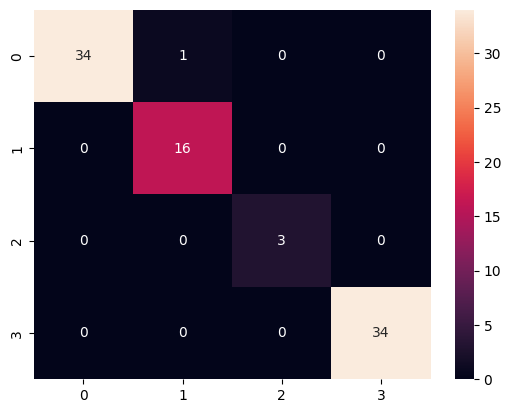

In [22]:
# Confusion matrix
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True)

In [23]:
# Predict the values based on the data set
res = rfc.predict([[44, 44.8, 79.0, 33.6, 66, 17.2, 44, 99, 33, 44, 33]])
print(res)

['A']


C:\Users\ullas_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
res = rfc.predict([[4, 4, 7, 3, 6, 1, 4, 9, 3, 4, 3]])
print(res)

['C']


C:\Users\ullas_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
res = rfc.predict([[22, 14, 17, 23, 16, 11, 24, 19, 23, 14, 13]])
print(res)

['S']


C:\Users\ullas_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
